<a href="https://colab.research.google.com/github/moritzfaller/Software-Entwicklung-und-Datenanalyse-in-Python/blob/main/Classification_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General

In [1]:
# install packages

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

# visualisation

pd.set_option('display.width', 700)
pd.options.display.max_colwidth = 100
np.set_printoptions(linewidth=800)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)

In [2]:
# clones public repo to colab

# deletes folder named 'colab_files'
!rm -rf 'colab_files'

# creates a colab directory which is identical to github repo
!git clone https://github.com/jeremykleindienst/colab_files.git

# loads dataset to variable data_full
data_full = pd.read_csv('/content/colab_files/merged_full_data_mood_clean.csv')

Cloning into 'colab_files'...
remote: Enumerating objects: 2205, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 2205 (delta 1), reused 98 (delta 0), pack-reused 2095
Receiving objects: 100% (2205/2205), 135.05 MiB | 25.70 MiB/s, done.
Resolving deltas: 100% (51/51), done.
Checking out files: 100% (2104/2104), done.


# Classification Models

In [ ]:
#data_full = data_full.drop('Unnamed: 0', axis = 1)

In [3]:
data_full

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Mood,name,artists,Popularity,album_name,release_year
0,0.673,0.902,2,-2.392,1,0.0346,0.05910,0.000262,0.0558,0.538,100.012,audio_features,5Hroj5K7vLpIG4FNCRIjbP,spotify:track:5Hroj5K7vLpIG4FNCRIjbP,https://api.spotify.com/v1/tracks/5Hroj5K7vLpIG4FNCRIjbP,https://api.spotify.com/v1/audio-analysis/5Hroj5K7vLpIG4FNCRIjbP,194240,4,happy,Best Day Of My Life,American Authors,80.0,"Oh, What A Life",2014
1,0.629,0.793,9,-5.942,1,0.0346,0.00952,0.000001,0.2180,0.588,95.981,audio_features,5YTtTbqxUzJHD3CpbNHerP,spotify:track:5YTtTbqxUzJHD3CpbNHerP,https://api.spotify.com/v1/tracks/5YTtTbqxUzJHD3CpbNHerP,https://api.spotify.com/v1/audio-analysis/5YTtTbqxUzJHD3CpbNHerP,231213,4,happy,Brighter Than The Sun,Colbie Caillat,65.0,All Of You,2011
2,0.388,0.338,10,-10.054,1,0.0329,0.65200,0.000004,0.2480,0.478,177.765,audio_features,2RlgNHKcydI9sayD2Df2xp,spotify:track:2RlgNHKcydI9sayD2Df2xp,https://api.spotify.com/v1/tracks/2RlgNHKcydI9sayD2Df2xp,https://api.spotify.com/v1/audio-analysis/2RlgNHKcydI9sayD2Df2xp,303373,4,happy,Mr. Blue Sky,Electric Light Orchestra,81.0,Out of the Blue,1977
3,0.547,0.820,8,-6.728,1,0.0805,0.26100,0.000000,0.3000,0.933,118.208,audio_features,2Nz6aF1umHh5Et6I5H581L,spotify:track:2Nz6aF1umHh5Et6I5H581L,https://api.spotify.com/v1/tracks/2Nz6aF1umHh5Et6I5H581L,https://api.spotify.com/v1/audio-analysis/2Nz6aF1umHh5Et6I5H581L,172867,4,happy,Hooked On A Feeling,Blue Swede,66.0,Hooked On A Feeling - 40th Anniversary Collection,2014
4,0.396,0.473,10,-7.670,0,0.0345,0.32600,0.000124,0.1090,0.385,133.449,audio_features,5t9KYe0Fhd5cW6UYT4qP8f,spotify:track:5t9KYe0Fhd5cW6UYT4qP8f,https://api.spotify.com/v1/tracks/5t9KYe0Fhd5cW6UYT4qP8f,https://api.spotify.com/v1/audio-analysis/5t9KYe0Fhd5cW6UYT4qP8f,219027,4,happy,Good Vibrations - Remastered 2001,The Beach Boys,73.0,Smiley Smile (Remastered),1967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,0.557,0.533,10,-6.817,0,0.0252,0.04920,0.000000,0.2050,0.233,143.994,audio_features,3NLrRZoMF0Lx6zTlYqeIo4,spotify:track:3NLrRZoMF0Lx6zTlYqeIo4,https://api.spotify.com/v1/tracks/3NLrRZoMF0Lx6zTlYqeIo4,https://api.spotify.com/v1/audio-analysis/3NLrRZoMF0Lx6zTlYqeIo4,238733,4,sad,Here Without You,3 Doors Down,76.0,Away From The Sun,2002
2578,0.321,0.511,8,-7.770,1,0.0306,0.51300,0.000000,0.1270,0.170,128.980,audio_features,5t2gSYVvBV9kH4t7Czertq,spotify:track:5t2gSYVvBV9kH4t7Czertq,https://api.spotify.com/v1/tracks/5t2gSYVvBV9kH4t7Czertq,https://api.spotify.com/v1/audio-analysis/5t2gSYVvBV9kH4t7Czertq,222120,4,sad,There You'll Be,Faith Hill,62.0,There You'll Be,2001
2579,0.539,0.683,5,-5.157,0,0.0276,0.00962,0.000000,0.2840,0.331,136.032,audio_features,6Qgva9AMxlkf7MWkLUkdFH,spotify:track:6Qgva9AMxlkf7MWkLUkdFH,https://api.spotify.com/v1/tracks/6Qgva9AMxlkf7MWkLUkdFH,https://api.spotify.com/v1/audio-analysis/6Qgva9AMxlkf7MWkLUkdFH,214107,4,sad,What Hurts The Most,Rascal Flatts,42.0,Me And My Gang,2006
2580,0.798,0.480,0,-5.564,1,0.0276,0.24700,0.000000,0.2370,0.643,108.241,audio_features,5S0cvScXb33JVpjTiY9Ivi,spotify:track:5S0cvScXb33JVpjTiY9Ivi,https://api.spotify.com/v1/tracks/5S0cvScXb33JVpjTiY9Ivi,https://api.spotify.com/v1/audio-analysis/5S0cvScXb33JVpjTiY9Ivi,255600,4,sad,Separated,Avant,56.0,My Thoughts,2000


In [4]:
# Perform feature scaling via standardization (z-score normalization):

std_scaler = StandardScaler()
data_features_nonscaled = data_full.loc[:,['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'release_year', 'time_signature', 'Popularity']]
data_features = std_scaler.fit_transform(data_features_nonscaled)
data_full['mood_happy'] = np.where(data_full['Mood']=='happy',1,0)
target = data_full['mood_happy']

In [5]:
# train and test split

X_train, X_test, y_train, y_test = train_test_split(data_features, target, test_size=0.3, random_state=24)

## Gradient Boosting Classifier

In [6]:
# train model (check accuracy)
classifier = GradientBoostingClassifier(random_state=24)
classifier.fit(X_train, y_train)
accuracy = classifier.score(X_test, y_test)
print(accuracy)

0.8709677419354839


In [ ]:
# Get the prediction values for the test data and print a confusion matrix
y_test_predicted = classifier.predict(X_test)
print(confusion_matrix(y_test, y_test_predicted))

[[325  60]
 [ 40 350]]


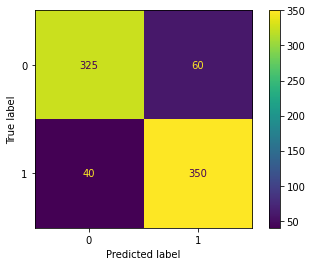

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

predictions = classifier.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()

plt.show()

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [11]:
pred=classifier.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       385
           1       0.85      0.90      0.88       390

    accuracy                           0.87       775
   macro avg       0.87      0.87      0.87       775
weighted avg       0.87      0.87      0.87       775



In [ ]:
predictors

In [ ]:
baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))
pred=baseline.predict(X_test)
print(classification_report(y_test, pred))

## Hyperparametertuning - GBC

We will optimize the following Parametes as mentioned in https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae:


*   learning_rate
*   n_estimators
*   max_depth
*   min_samples_split
*   min_samples_leaf
*   max_features



In [8]:
classifier = GradientBoostingClassifier(random_state=24, learning_rate=1)
classifier.fit(X_train, y_train)
accuracy = classifier.score(X_test, y_test)
print(accuracy)

0.8593548387096774


In [20]:
# Creating several lists with values for the parameters
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
max_depth = np.linspace(1, 32, 32, endpoint=True)
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
max_features = list(range(1,X_train.shape[1]))

In [ ]:
train_test = []
learning_rates_x = []
n_estimators_x = []
max_depth_x = []
min_samples_splits_x = []
min_samples_leafs_x = []
max_features_x = []
score = []



for l in learning_rates:
  for n in n_estimators:
    for md in max_depth:
      for ms in min_samples_splits:
        for ml in min_samples_leafs:
          for mf in max_features:
            gbc_classifier = GradientBoostingClassifier(random_state=24, learning_rate=l, n_estimators=n, max_depth=md, min_samples_split=ms, min_samples_leaf=ml,max_features=mf)
            gbc_classifier.fit(X_train, y_train)

            train = gbc_classifier.score(X_train, y_train)
            train_test.append('train')
            learning_rates_x.append(l)
            n_estimators_x.append(n)
            max_depth_x.append(md)
            min_samples_splits_x.append(ms)
            min_samples_leafs_x.append(ml)
            max_features_x.append(mf)
            score.append(train)

            test = gbc_classifier.score(X_test, y_test)
            train_test.append('test')
            learning_rates_x.append(l)
            n_estimators_x.append(n)
            max_depth_x.append(md)
            min_samples_splits_x.append(ms)
            min_samples_leafs_x.append(ml)
            max_features_x.append(mf)
            score.append(test)

result_df = pd.DataFrame()
result_df['train_test'] = train_test
result_df['learning_rates'] = learning_rates_x
result_df['n_estimators'] = n_estimators_x
result_df['max_depth'] = max_depth_x
result_df['min_samples_splits'] = min_samples_splits_x
result_df['min_samples_leafs'] = min_samples_leafs_x
result_df['max_features'] = max_features_x
result_df['score'] = score

print(result_df)

## Supporting Vector Classification (SVC)

In [ ]:
from sklearn.svm import SVC

In [ ]:
# SVM: train model (check accuracy)
svc_classifier = SVC(gamma = 2, C = 1)
svc_classifier.fit(X_train, y_train)
svc_accuracy = svc_classifier.score(X_test, y_test)
print(svc_accuracy)

0.6735483870967742


In [ ]:
y_test_predicted = svc_classifier.predict(X_test)
print(confusion_matrix(y_test, y_test_predicted))

[[362  23]
 [230 160]]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

predictions = svc_classifier.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=svc_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc_classifier.classes_)
disp.plot()

plt.show()

Parameters:
* Kernels
* C (penalty parameter)
* Gamma

https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/

### Hyper Hyper Parameter Tuning - Manually

In [ ]:
p_gamma = [1, 0.1, 0.01, 0.001]
p_c = [0.1, 1, 10, 100]
p_kernel = ['rbf', 'linear', 'poly', 'sigmoid']

train_test = []
gamma = []
c = []
kernel = []
score = []

for g_value in p_gamma:
  for c_value in p_c:
    for k_value in p_kernel:
      svc_classifier = SVC(gamma = g_value, C = c_value, kernel=k_value)
      svc_classifier.fit(X_train, y_train)

      train = svc_classifier.score(X_train, y_train)
      train_test.append('train')
      gamma.append(g_value)
      c.append(c_value)
      kernel.append(k_value)
      score.append(train)

      test = svc_classifier.score(X_test, y_test)
      train_test.append('test')
      gamma.append(g_value)
      c.append(c_value)
      kernel.append(k_value)
      score.append(test)

result_df = pd.DataFrame()
result_df['train_test'] = train_test
result_df['gamma'] = gamma
result_df['C'] = c
result_df['kernel'] = kernel
result_df['score'] = score

print(result_df)

    train_test  gamma      C   kernel     score
0        train  1.000    0.1      rbf  0.501937
1         test  1.000    0.1      rbf  0.495484
2        train  1.000    0.1   linear  0.872717
3         test  1.000    0.1   linear  0.861935
4        train  1.000    0.1     poly  0.985058
..         ...    ...    ...      ...       ...
123       test  0.001  100.0   linear  0.861935
124      train  0.001  100.0     poly  0.501384
125       test  0.001  100.0     poly  0.496774
126      train  0.001  100.0  sigmoid  0.872717
127       test  0.001  100.0  sigmoid  0.861935

[128 rows x 5 columns]


In [ ]:
# best combination for train
print(result_df.sort_values(by=['score'], ascending=False))

    train_test  gamma      C kernel     score
28       train  1.000  100.0   poly  1.000000
24       train  1.000  100.0    rbf  1.000000
20       train  1.000   10.0   poly  0.999447
16       train  1.000   10.0    rbf  0.999447
12       train  1.000    1.0   poly  0.998340
..         ...    ...    ...    ...       ...
109       test  0.001    1.0   poly  0.496774
69        test  0.010    0.1   poly  0.496774
101       test  0.001    0.1   poly  0.496774
125       test  0.001  100.0   poly  0.496774
1         test  1.000    0.1    rbf  0.495484

[128 rows x 5 columns]


In [ ]:
# best combination for train
result_df_test = result_df.loc[result_df['train_test'] == 'train']
print(result_df_test.sort_values(by=['score'], ascending=False))

In [ ]:
# best combination for test
result_df_test = result_df.loc[result_df['train_test'] == 'test']
print(result_df_test.sort_values(by=['score'], ascending=False))

### Hyper Hyper Parameter Tuning - with Library

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  

In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

In [ ]:
print(grid.best_estimator_)

SVC(C=10, gamma=0.01)


In [ ]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[324  61]
 [ 43 347]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       385
           1       0.85      0.89      0.87       390

    accuracy                           0.87       775
   macro avg       0.87      0.87      0.87       775
weighted avg       0.87      0.87      0.87       775



# **Image Models**

## **CNN Images** (not relevant?)

In [ ]:
import os
import pandas as pd

In [ ]:
# folder name of train set
train_happy = os.listdir('/content/happy_spec')

train_happy

In [ ]:
# folder name of train set
train_sad = os.listdir('/content/sad_spec')

train_sad

In [ ]:
train_full = train_happy+train_sad
train_full

In [ ]:
train_happy_label = []

for spec in train_happy:
  train_happy_label.append(1)

In [ ]:
train_sad_label = []

for spec in train_sad:
  train_sad_label.append(0)

In [ ]:
train_label_full = train_happy_label+train_sad_label

In [ ]:
df_train = pd.DataFrame()

In [ ]:
df_train['spec'] = train_full
df_train['label'] = train_label_full

In [ ]:
df_train

,spec,label,class_description
0,0CKxrnF9KplS21LTjkkqsW.png,1,happy
1,0JgrkVehf9xqNlPdQK9FVI.png,1,happy
2,0eM4CcU3AaE7m4FGH8vgql.png,1,happy
3,0RacUz49IeiaBOmcBYw3Ut.png,1,happy
4,0FDzzruyVECATHXKHFs9eJ.png,1,happy
...,...,...,...
198,0VoT3xtw4A7D9l6Ir0sjuK.png,0,sad
199,0KdLJss91oyCbKSkDxtZaZ.png,0,sad
200,0vg4WnUWvze6pBOJDTq99k.png,0,sad
201,0rKtyWc8bvkriBthvHKY8d.png,0,sad


In [ ]:
class_mapping = {
    0: 'sad',
    1: 'happy'
}

df_train['class_description'] = df_train.label.apply(lambda x: class_mapping[x])

## **CNN** (complex Code Marian)



In [ ]:
# connect Google drive to colab

# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# get images from drive folder and split into train and test

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dataset = image_dataset_from_directory('/content/colab_files/spectograms', labels='inferred', validation_split=0.2, subset='training', label_mode='categorical', seed=42)
val_dataset = image_dataset_from_directory('/content/colab_files/spectograms', labels='inferred', validation_split=0.2, subset='validation', label_mode='categorical', seed=42)

Found 200 files belonging to 2 classes.
Using 160 files for training.
Found 200 files belonging to 2 classes.
Using 40 files for validation.


There's a lot to unpack here, so let's start:


*   `train` describes the folder from which keras should load images
*   `labels='inferred'` means that keras will take the target label for each image from the folder structure
*   `validation_split=0.2` means that keras will retain 20% for validation
*   `subset` determines whether keras returns the training or validation dataset
*   `label_mode='categorical'` means that the labels are encoded as categorical vectors
*   `seed` describes the random seed to be used, this has to be the same to ensure that each image is used only once in the training and test set



We can now start defining our model. As previously mentioned, we'll be using a CNN architecture. The architecture was taken from [this kaggle post](https://www.kaggle.com/abhinavkrjha/using-cnn-architecture-99-631-accuracy).

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential

# again, we start with the Sequential() call
cnn = Sequential()

# add 4 layer pairs consisting of a convolution and max pooling layer
# the number of filters doubles with each layer to deal with the rising complexity of features
# the input shape in this case consists of our images size (256x256) with the color information (RGB = 3)
cnn.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(256,256,3), kernel_initializer='glorot_normal'))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu', kernel_initializer='glorot_normal'))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu', kernel_initializer='glorot_normal'))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu', kernel_initializer='glorot_normal'))
cnn.add(MaxPooling2D(pool_size=2))

# add dropout for regularization
cnn.add(Dropout(0.5))
# flatten all activations into one vector
cnn.add(Flatten())
# final fully-connected hidden layer
cnn.add(Dense(500, activation='relu', kernel_initializer='glorot_normal'))
cnn.add(Dropout(0.5))
# output layer with 2 neurons (2 classes)
cnn.add(Dense(2, activation='softmax', kernel_initializer='glorot_normal'))

This architecture looks quite complex and it actually is (nothing compared to the size of architectures reaching state-of-the-art results, but still), but you can find many CNN architectures which will perform quite well on a range of different tasks. Often times, architectures that work very well for specific tasks (like this one) are created using a trial-and-error approach and hyperparameter optimization.

Because we defined the size of our inputs explicitly, we can already now plot the architecture of our model:

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(cnn, show_shapes=True,
    show_dtype=True)

We can also plot the architecture of a state-of-the-art CNN model (e.g. XCeption for the `imagenet` dataset): see [here](https://keras.io/api/applications/).

In [ ]:
xception = tf.keras.applications.Xception(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

plot_model(xception, show_shapes=True,
    show_dtype=True)

Now we're ready to prepare our model for training:

In [ ]:
cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

We will also be using something called `early stopping`. In many cases, our model performance stops improving after a certain number of epochs. To speed up the training process, we can instruct keras to stop training when the performance of the model has not improved after a fixed number of epochs:

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss', # which metric keras should look at for deciding early stopping
    min_delta=0.01, # how much difference will be counted as an improvement; everything below will count as 'not improved'
    patience=3, # the number of epochs to wait for improvement before stopping
    verbose=0, 
    restore_best_weights=True # go back to the weights of the model with the best performance value after stopping
)

The callback has to be passed in during training. Note that training might take a while:

In [ ]:
# Caution: this takes ~25-45min

cnn_history = cnn.fit(train_dataset, 
                          validation_data = val_dataset, 
                          epochs=25, 
                          batch_size=32, # keras will push 32 images in one batch through the network for training
                          verbose=1, # print progress for each epoch
                          callbacks = [early_stopping])

Epoch 1/25
53/53 [==============================] - 627s 11s/step - loss: 206.3717 - accuracy: 0.5122 - val_loss: 0.6930 - val_accuracy: 0.5643
Epoch 2/25
53/53 [==============================] - 542s 10s/step - loss: 4.4191 - accuracy: 0.5253 - val_loss: 0.6682 - val_accuracy: 0.7119
Epoch 3/25
53/53 [==============================] - 525s 10s/step - loss: 2.0001 - accuracy: 0.5134 - val_loss: 0.7067 - val_accuracy: 0.4357
Epoch 4/25
53/53 [==============================] - 527s 10s/step - loss: 0.7826 - accuracy: 0.4985 - val_loss: 0.6932 - val_accuracy: 0.4357
Epoch 5/25
53/53 [==============================] - 522s 10s/step - loss: 0.6934 - accuracy: 0.4860 - val_loss: 0.6932 - val_accuracy: 0.4357


Analysis over time:

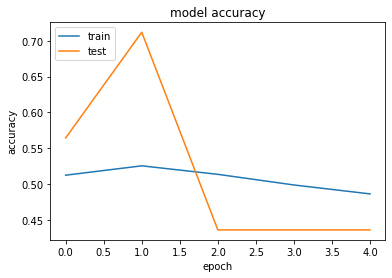

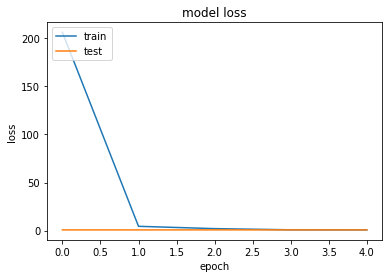

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The difference in accuracy/loss between train and test is probably caused by the dropout layers which are only active during training but not during testing.


Let's take a closer look at the model performance. For that, we first have to retrieve the actual predictions using the following code:

In [ ]:
import numpy as np
predictions = np.array([])
labels =  np.array([])

# we have to iterate over the dataset and get the predictions for each example individually
for x, y in val_dataset:
  predictions = np.concatenate([predictions, np.argmax(cnn.predict(x), axis=-1)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

Now we can print the classification report:

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(labels, predictions))

              precision    recall  f1-score   support

         0.0       0.62      0.89      0.73       183
         1.0       0.87      0.58      0.69       237

    accuracy                           0.71       420
   macro avg       0.74      0.73      0.71       420
weighted avg       0.76      0.71      0.71       420



## **CNN for tuning**

https://keras.io/keras_tuner/

https://www.youtube.com/watch?v=Clo1HKB50Ug

In [ ]:
# connect Google drive to colab

# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# get images from drive folder and split into train and test

# import tensorflow as tf
# from tensorflow.keras.preprocessing import image_dataset_from_directory

# train_dataset = image_dataset_from_directory('/content/drive/MyDrive/Colab_Files', labels='inferred', validation_split=0.2, subset='training', label_mode='categorical', seed=42)
# val_dataset = image_dataset_from_directory('/content/drive/MyDrive/Colab_Files', labels='inferred', validation_split=0.2, subset='validation', label_mode='categorical', seed=42)

In [ ]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
categories=['happy','sad']
flat_data_arr=[] #input array
target_arr=[] #output array

datadir='/content/colab_files/spectograms' 
#path which contains all the categories of images

In [ ]:
for i in categories:
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(categories.index(i))
    print(f'loaded category:{i} successfully')

loading... category : happy
loaded category:happy successfully
loading... category : sad
loaded category:sad successfully


In [ ]:
flat_data=np.array(flat_data_arr)

target=np.array(target_arr)

df=pd.DataFrame(flat_data) #dataframe
df['Target']=target

x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 67500)
(160,)
(40, 67500)
(40,)


In [ ]:
!pip install keras-tuner
import keras_tuner as kt
from tensorflow import keras

In [ ]:
!rm -rf 'cnn_model1'
!rm -rf 'cnn_model2'
!rm -rf 'cnn_model3'

### Model 1

In [ ]:
# varying parameters:
# number of neurons per layer, learning rate

def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Choice('units', [8, 16, 32]),
      activation='relu'))
  model.add(keras.layers.Dense(2, activation='relu'))
  model.compile(optimizer=keras.optimizers.Adam(
                  hp.Choice('learning_rate',values=[0.01, 0.001])),
                loss='mse',
                metrics=['accuracy'])
  return model

In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial = 3,
    directory = 'cnn_model1',
    project_name = 'model1') # we try 5 times, in each try there are 3 models; saves time 

In [ ]:
tuner.search_space_summary() 
# search space size = 2 means that we are varying two hyperparameters (number units per hidden layer & learning rate)

In [ ]:
tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

In [ ]:
tuner.results_summary()

### Model 2

In [ ]:
# varying parameters:
# number of hidden layers, number of neurons per layer, activation function

def build_model2(hp):
  model = keras.Sequential()

  for i in range(hp.Int('layers',2,6)):
    model.add(keras.layers.Dense(
        units = hp.Int('units_'+str(i), 50, 100, step=10),
        activation=hp.Choice('act_'+str(i),['relu','sigmoid'])))
  
  model.add(keras.layers.Dense(2, activation='softmax'))
  model.compile('adam', 'sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
tuner2 = kt.RandomSearch(
    build_model2,
    objective='val_accuracy',
    max_trials=4,
    executions_per_trial = 1,
    directory = 'cnn_model2',
    project_name = 'model2')

In [ ]:
tuner2.search_space_summary() 

In [ ]:
tuner2.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

In [ ]:
tuner2.results_summary()

### Model 3

In [ ]:
# varying parameters:
# number of hidden layers, number of neurons per layer, activation function, learning rate

def build_model3(hp):
  model = keras.Sequential()

  for i in range(hp.Int('layers',2,6)):
      model.add(keras.layers.Dense(
          units = hp.Int('units_'+str(i), 50, 100, step=10),
          activation=hp.Choice('act_'+str(i),['relu','sigmoid'])))

  model.add(keras.layers.Dense(2, activation='softmax'))
  model.compile(optimizer=keras.optimizers.Adam(
                  hp.Choice('learning_rate',values=[0.01, 0.001])),
                loss = 'mse',
                metrics=['accuracy'])
  return model

In [ ]:
tuner3 = kt.RandomSearch(
    build_model3,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial = 3,
    directory = 'cnn_model3',
    project_name = 'model3')

In [ ]:
tuner3 = kt.RandomSearch(
    build_model3,
    objective= kt.Objective("val_accuracy", direction="max"),
    max_trials=5,
    executions_per_trial = 3,
    directory = 'cnn_model3',
    project_name = 'model3')

In [ ]:
tuner3.search_space_summary() 

In [ ]:
tuner3.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Trial 5 Complete [00h 00m 10s]
val_accuracy: 0.5

Best val_accuracy So Far: 0.5
Total elapsed time: 00h 01m 04s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner3.results_summary()

## **SVM** 

https://medium.com/analytics-vidhya/image-classification-using-machine-learning-support-vector-machine-svm-dc7a0ec92e01

In [ ]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
categories=['happy','sad']
flat_data_arr=[] #input array
target_arr=[] #output array

datadir='/content/drive/MyDrive/Colab_Files' 
#path which contains all the categories of images

In [ ]:
for i in categories:
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(categories.index(i))
    print(f'loaded category:{i} successfully')

loading... category : happy
loaded category:happy successfully
loading... category : sad
loaded category:sad successfully


In [ ]:
flat_data=np.array(flat_data_arr)

target=np.array(target_arr)

df=pd.DataFrame(flat_data) #dataframe
df['Target']=target

x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

### **Model + Tuning**

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc = svm.SVC(probability=True)
model = GridSearchCV(svc,param_grid)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

model.fit(x_train,y_train)
print('The Model is trained well with the given images')

# model.best_params_ contains the best parameters obtained from GridSearchCV

Splitted Successfully


In [ ]:
y_pred = model.predict(x_test)

print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

In [ ]:
# Get user input and predict category

url=input('Enter URL of Image :')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])